In [125]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')


spam=pd.read_csv("spam.csv",encoding='ISO-8859-1')
spam.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [126]:
spam=spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)


In [127]:
spam=spam.rename(columns={'v1':'target','v2':'text'})
spam.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [128]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
spam.target=le.fit_transform(spam.target)
spam.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


0----> not spam
1----> spam

In [129]:
spam.isnull().sum()

target    0
text      0
dtype: int64

In [130]:
spam.count()

target    5572
text      5572
dtype: int64

In [131]:
spam=spam.drop_duplicates(keep='first')
spam.count()

target    5169
text      5169
dtype: int64

<Axes: xlabel='target', ylabel='count'>

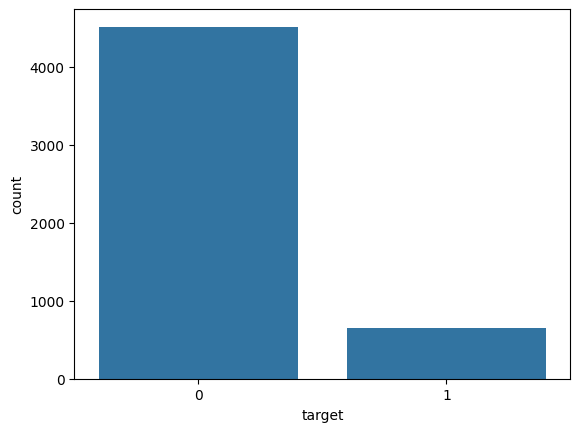

In [132]:
import seaborn as sns 
sns.countplot(data=spam,x=spam.target)

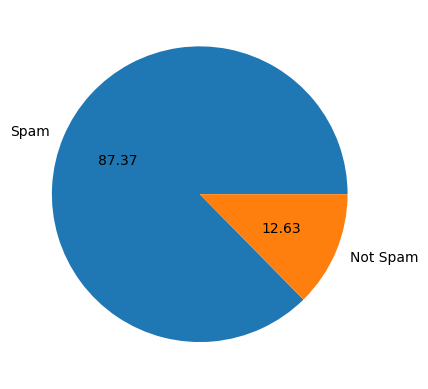

In [133]:
import matplotlib.pyplot as plt 
plt.pie(spam.target.value_counts(),labels={'Not Spam','Spam'},autopct="%0.2f")
plt.show()

In [134]:
port_stem=PorterStemmer()
stop_words = set(stopwords.words('english'))  # Pre-compile stop words for efficiency
stemmer = PorterStemmer()  # Create stemmer object once outside the function

def clean(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Split into words
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]  # Stem and filter
    return " ".join(stemmed_words)  # Join stemmed words into a string


In [135]:
type(spam.text[0])

str

In [136]:
spam.text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [137]:
print(clean(spam.text[0]))

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [138]:
spam["clean_text"]=spam.text.apply(clean)

In [139]:
spam.head(5)

,target,text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


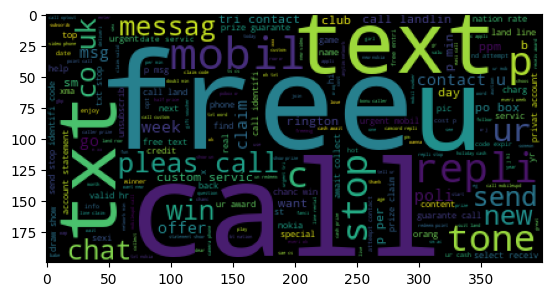

In [140]:
from wordcloud import WordCloud
wc=WordCloud()
spam_wc=wc.generate(spam[spam.target==1]['clean_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

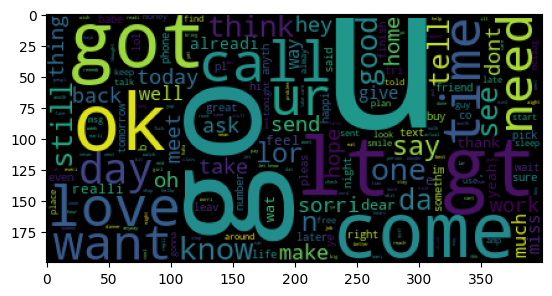

In [141]:
ham_wc=wc.generate(spam[spam.target==0]['clean_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

In [142]:
spam_corpus=[]
for msg in spam[spam.target==1]['clean_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

from collections import Counter
Counter(spam_corpus).most_common(20)

[('call', 346),
 ('free', 197),
 ('p', 158),
 ('u', 157),
 ('txt', 152),
 ('text', 129),
 ('mobil', 121),
 ('ur', 119),
 ('stop', 114),
 ('repli', 104),
 ('claim', 98),
 ('prize', 85),
 ('www', 83),
 ('min', 78),
 ('get', 75),
 ('tone', 73),
 ('cash', 65),
 ('servic', 65),
 ('new', 64),
 ('uk', 63)]

In [143]:
ham_corpus=[]
for msg in spam[spam.target==0]['clean_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

from collections import Counter
Counter(spam_corpus).most_common(20)

[('u', 1079),
 ('call', 586),
 ('go', 443),
 ('get', 433),
 ('ur', 317),
 ('gt', 288),
 ('lt', 287),
 ('come', 282),
 ('ok', 260),
 ('know', 255),
 ('free', 253),
 ('day', 252),
 ('like', 248),
 ('time', 243),
 ('want', 241),
 ('love', 235),
 ('got', 233),
 ('good', 228),
 ('text', 215),
 ('need', 185)]

In [195]:
cv=CountVectorizer()
x=cv.fit_transform(spam.clean_text).toarray()
x.shape

(5169, 6221)

In [196]:
y=spam.target.values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [197]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.9958887545344619

In [147]:
model.score(x_test,y_test)

0.9758220502901354

In [148]:
y_predict=model.predict(x_test)
from sklearn.metrics import precision_score
print(precision_score(y_test,y_predict))

0.991304347826087


In [263]:
tfidf=TfidfVectorizer(max_features=4000)
x=tfidf.fit_transform(spam.clean_text).toarray()
y=spam.target.values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.9714631197097945

In [264]:
x.shape

(5169, 4000)

In [265]:
model.score(x_test,y_test)

0.9545454545454546

In [266]:
y_predict=model.predict(x_test)
# from sklearn.metrics import precision_score
print(precision_score(y_test,y_predict))

0.9690721649484536


In [267]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_model.score(x_train,y_train)

1.0

In [268]:
rf_model.score(x_test,y_test)

0.9729206963249516

In [269]:
y_rf_predict=rf_model.predict(x_test)
print(precision_score(y_test,y_rf_predict))

1.0


In [276]:
input_msg=input("Enter the text: ")
clean_msg=clean(input_msg)
vector_msg=tfidf.transform([clean_msg])
result=rf_model.predict(vector_msg)

if result==1:
    print("This message is Spam.")
else:
    print("This message is not Spam.")

This message is not Spam.
